<h1><center>Semester Project</center></h1>


Over the past decades, the development of online scientific platforms like 
arXiv.org or JSTOR radically changed the way researchers access, browse, or read 
scientific articles. Yet, while observing the behavior of researchers in libraries and 
laboratories has become commonplace in the humanities, the computational study 
of digital research practices is only in its early days. This project aims at documenting 
the behavior of scientists on online platforms by making sense of the digital traces 
they generate while navigating.

During this project we are using the browsing logs of Gallica ( https://gallica.bnf.fr/ ) to make sense of user experience and identify patterns.

Project goals : 

* Parsing and sessionizing the log files in order to extract relevant sessions.
* Building an ontology based on the descriptors provided by the ARKs (Archival Resource Key, i.e. the metadata) of the documents (type of document, discipline, year, etc.)
* Using off-the-shelf Python libraries of topological data analysis (TDA) to identify the geometrical shapes of users’ paths through the ontology
* Building a typology of users’ behaviour on the platform by clustering the previously identified users’ paths

## Table Of Content:
[I. Exploring Gallica Logs](#first-bullet)

[II. Creating Sessions](#second-bullet)

[III. Word2vec Representation](#third-bullet)

[IV. Path Representation](#fourth-bullet)

[V. Path Clustering](#fifth-bullet)

[VI. Analysis](#sixth-bullet)

<a class="anchor" id="first-bullet"></a><h2><center>I. Exploring Gallica Logs</center></h2> 

## 1. Importing logs

Over the past decades, the development of online scientific platforms like 
arXiv.org or JSTOR radically changed the way researchers access, browse, or read 
scientific articles. Yet, while observing the behavior of researchers in libraries and 
laboratories has become commonplace in the humanities, the computational study 
of digital research practices is only in its early days. This project aims at documenting 
the behavior of scientists on online platforms by making sense of the digital traces 
they generate while navigating.

During this project we are using the browsing logs of Gallica ( https://gallica.bnf.fr/ ) to make sense of user experience and identify patterns.

Project goals : 

* Parsing and sessionizing the log files in order to extract relevant sessions.
* Building an ontology based on the descriptors provided by the ARKs (Archival Resource Key, i.e. the metadata) of the documents (type of document, discipline, year, etc.)
* Using off-the-shelf Python libraries of topological data analysis (TDA) to identify the geometrical shapes of users’ paths through the ontology
* Building a typology of users’ behaviour on the platform by clustering the previously identified users’ paths

## Table Of Content:
[I. Exploring Gallica Logs](#first-bullet)

[II. Creating Sessions](#second-bullet)

[III. Word2vec Representation](#third-bullet)

[IV. Path Representation](#fourth-bullet)

[V. Path Clustering](#fifth-bullet)

[VI. Analysis](#sixth-bullet)

<a class="anchor" id="first-bullet"></a><h2><center>I. Exploring Gallica Logs</center></h2> 

## 1. Importing logs

Over the past decades, the development of online scientific platforms like 
arXiv.org or JSTOR radically changed the way researchers access, browse, or read 
scientific articles. Yet, while observing the behavior of researchers in libraries and 
laboratories has become commonplace in the humanities, the computational study 
of digital research practices is only in its early days. This project aims at documenting 
the behavior of scientists on online platforms by making sense of the digital traces 
they generate while navigating.

During this project we are using the browsing logs of Gallica ( https://gallica.bnf.fr/ ) to make sense of user experience and identify patterns.

Project goals : 

* Parsing and sessionizing the log files in order to extract relevant sessions.
* Building an ontology based on the descriptors provided by the ARKs (Archival Resource Key, i.e. the metadata) of the documents (type of document, discipline, year, etc.)
* Using off-the-shelf Python libraries of topological data analysis (TDA) to identify the geometrical shapes of users’ paths through the ontology
* Building a typology of users’ behaviour on the platform by clustering the previously identified users’ paths

## Table Of Content:
[I. Exploring Gallica Logs](#first-bullet)

[II. Creating Sessions](#second-bullet)

[III. Word2vec Representation](#third-bullet)

[IV. Path Representation](#fourth-bullet)

[V. Path Clustering](#fifth-bullet)

[VI. Analysis](#sixth-bullet)

<a class="anchor" id="first-bullet"></a><h2><center>I. Exploring Gallica Logs</center></h2> 

## 1. Importing logs

In [1]:
import glob
import pandas as pd
import numpy as np
import re 

path = r'/shared_volume/LogGallicaAvril2016'
all_files = glob.glob(path+ "/*.log")

In [2]:

all_files.sort(key=lambda f: int(re.sub('\D', '', f)))

In [5]:
some_files = all_files[300:1000]

In [6]:
len(some_files)

700

In [7]:
df = pd.concat((pd.read_csv(f,encoding='UTF-8',sep=r'\\t', engine='python',header=None,error_bad_lines=False) for f in some_files))

Skipping line 18694: Expected 1 fields in line 18694, saw 2. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 20794: Expected 1 fields in line 20794, saw 2. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 25845: Expected 1 fields in line 25845, saw 2. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 56733: Expected 1 fields in line 56733, saw 2. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 56931: Expected 1 fields in line 56931, saw 2. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 57400: Expected 1 fields in line 57400, saw 2. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 57487: Expected 1 fields in line 57487, saw 2. Error could possibly be due to quotes b

In [37]:
df.shape

(51318580, 1)

## 2. Exploring logs

In [8]:
lines_df = df

In [9]:
# we need to split each line into relevant metadata according to this example from Nouvellet et al.

![caption](log_example.png)

In [10]:
# first split, according to the example we split by ## to get ip, pays, ville and then date/requete/procole/code/taille/référant together
lines_df=lines_df[0].str.split('##', expand=True)

In [11]:
lines_df.head()

,0,1,2,3,4
0,,2beea6c2c1693bc11aec84d80a42724e,United States,Chicago,"- - [04/Apr/2016:22:30:21 +0200] ""GET //iiif/a..."
1,,f4a5009cf12097a892afadf95d2dcd0d,Belgium,Brussels,"- - [04/Apr/2016:22:30:24 +0200] ""GET /service..."
2,,f4a5009cf12097a892afadf95d2dcd0d,Belgium,Brussels,"- - [04/Apr/2016:22:30:24 +0200] ""GET /ark:/12..."
3,,f4a5009cf12097a892afadf95d2dcd0d,Belgium,Brussels,"- - [04/Apr/2016:22:30:24 +0200] ""GET /ark:/12..."
4,,f4a5009cf12097a892afadf95d2dcd0d,Belgium,Brussels,"- - [04/Apr/2016:22:30:24 +0200] ""GET /ark:/12..."


### 2.1 Parsing HTTP requests

#### Experimenting with extracting data

In [12]:
# This is just experimental, TODO change with lazy eval regex when working on bigger data.

In [13]:
import re
import shutil
import requests
import xmltodict
from bs4 import BeautifulSoup
from xml.etree import ElementTree as ET

In [14]:
'''
Function to query Gallica API and get metadata about a document from it's ark.
inputs: 
    'id': here id is the ARK of the document, that we extract from the request
Outputs:
     this function outputs the result of the API as a dictionary.

'''
def OAI(id):

    OAI_BASEURL = 'https://gallica.bnf.fr/services/OAIRecord?ark='

    url = "".join([OAI_BASEURL, id])
    #print(url)

    s = requests.get(url, stream=True)
    soup = BeautifulSoup(s.content,"lxml-xml")
    #print(soup)
    file = open('oai.xml', 'wb')
    file.write(soup.prettify().encode('UTF-8'))
    file.close()
    with open('oai.xml',encoding='UTF-8') as xml:
        doc = xmltodict.parse(xml.read())
        return doc


In [15]:
temp = pd.DataFrame()

In [16]:
# extracting the date of query
temp['Date']=lines_df.apply(lambda x: x[4].split("]")[0].split("[")[1] ,axis = 1)

In [18]:
temp

,Date
0,04/Apr/2016:22:30:21 +0200
1,04/Apr/2016:22:30:24 +0200
2,04/Apr/2016:22:30:24 +0200
3,04/Apr/2016:22:30:24 +0200
4,04/Apr/2016:22:30:24 +0200
...,...
112167,12/Apr/2016:05:00:46 +0200
112168,12/Apr/2016:05:00:46 +0200
112169,12/Apr/2016:05:00:46 +0200
112170,12/Apr/2016:05:00:47 +0200


In [19]:
# extracting request
temp['Request'] = lines_df.apply(lambda x: ' '.join(x[4].split("\"")[1].split(' ')[:2]),axis=1)

In [ ]:
# extracting protocol, still need to look into it further
# do i really need to extract protocol at this point?
# commenting this for now until further research

# temp['protocol'] = lines_df.apply(lambda x: x[4].split("\"")[1].split(' ')[2], axis=1)

In [ ]:
# extracting code
# try catch to avoid index errors, need to look into this further, what happens exactly there?
def trycode(value, default):
    try:
        return value[4].split("\"")[2].split(' ')[1]
    except (IndexError):
        return '-'
    return default


# temp['Code'] = lines_df.apply(lambda x: trycode(x,'-'), axis=1)

In [54]:
# extracting length
# try catch to avoid index errors, need to look into this further, what happens exactly there?
def trylength(value, default):
    try:
        return value[4].split("\"")[2].split(' ')[2] 
    except (IndexError):
        return '-'
    return default

# temp['Length'] = lines_df.apply(lambda x:  trylength(x,'-') , axis=1)

In [55]:
# extracting referant
# temp['Referant'] = lines_df.apply(lambda x: x[4].split("\"")[3], axis=1)

In [20]:
# extracting ark name

#function to check if the request contains ark
def extract_ark(request):
    # capture everything between 12148 and / or between 12148 and . using regex
    ark = '-'
    ark = re.findall('(?<=12148/).+?(?=/)|(?<=12148/).+?(?=\.)', request)
    return ark


temp['Ark'] = temp.apply(lambda x: extract_ark(x['Request']), axis=1)
    

In [21]:
lines_df = lines_df.rename(columns={1:"IPAdress",2:"Country",3:"City",4:"Full_request"})

In [22]:
final_df = pd.concat([lines_df, temp],axis=1)

In [23]:
final_df

,0,IPAdress,Country,City,Full_request,Date,Request,Ark
0,,2beea6c2c1693bc11aec84d80a42724e,United States,Chicago,"- - [04/Apr/2016:22:30:21 +0200] ""GET //iiif/a...",04/Apr/2016:22:30:21 +0200,GET //iiif/ark:/12148/bpt6k105952t/f57/full/17...,[bpt6k105952t]
1,,f4a5009cf12097a892afadf95d2dcd0d,Belgium,Brussels,"- - [04/Apr/2016:22:30:24 +0200] ""GET /service...",04/Apr/2016:22:30:24 +0200,GET /services/ajax/pagination/page/SINGLE/ark:...,[bpt6k111880x]
2,,f4a5009cf12097a892afadf95d2dcd0d,Belgium,Brussels,"- - [04/Apr/2016:22:30:24 +0200] ""GET /ark:/12...",04/Apr/2016:22:30:24 +0200,GET /ark:/12148/bpt6k111880x/f7.highres,[bpt6k111880x]
3,,f4a5009cf12097a892afadf95d2dcd0d,Belgium,Brussels,"- - [04/Apr/2016:22:30:24 +0200] ""GET /ark:/12...",04/Apr/2016:22:30:24 +0200,GET /ark:/12148/bpt6k111880x/f9.highres,[bpt6k111880x]
4,,f4a5009cf12097a892afadf95d2dcd0d,Belgium,Brussels,"- - [04/Apr/2016:22:30:24 +0200] ""GET /ark:/12...",04/Apr/2016:22:30:24 +0200,GET /ark:/12148/bpt6k111880x/f8.highres,[bpt6k111880x]
...,...,...,...,...,...,...,...,...
112167,,706a0d02d37c04a9b0b4ac2054fbd91d,United States,New Haven,"- - [12/Apr/2016:05:00:46 +0200] ""GET /iiif/ar...",12/Apr/2016:05:00:46 +0200,"GET /iiif/ark:/12148/btv1b84539771/f1/full/61,...",[btv1b84539771]
112168,,706a0d02d37c04a9b0b4ac2054fbd91d,United States,New Haven,"- - [12/Apr/2016:05:00:46 +0200] ""GET /iiif/ar...",12/Apr/2016:05:00:46 +0200,GET /iiif/ark:/12148/btv1b10500687r/f5/full/56...,[btv1b10500687r]
112169,,706a0d02d37c04a9b0b4ac2054fbd91d,United States,New Haven,"- - [12/Apr/2016:05:00:46 +0200] ""GET /iiif/ar...",12/Apr/2016:05:00:46 +0200,"GET /iiif/ark:/12148/btv1b84539771/f3/full/59,...",[btv1b84539771]
112170,,706a0d02d37c04a9b0b4ac2054fbd91d,United States,New Haven,"- - [12/Apr/2016:05:00:47 +0200] ""GET /iiif/ar...",12/Apr/2016:05:00:47 +0200,"GET /iiif/ark:/12148/btv1b84539771/f4/full/59,...",[btv1b84539771]


<a class="anchor" id="second-bullet"></a><h2><center>II. Creating Sessions</center></h2> 

In [24]:
# save dataframe 
#final_df.to_csv('/shared_volume/April2016Week1.csv',index=False)

#### 1. Creating a dataframe with IP and the difference in time between each connexion and the last

In [25]:
# Session: séquences de requêtes
# Regrouper même adresse IP => session se termine intervalle supérieur à 60 minutes entre deux requêtes. 
sessions_df = final_df.groupby('IPAdress').agg({'Ark':list,'Date':list})
sessions_df.head()

,Ark,Date
IPAdress,,
100016200aa785eebfb69affbc17dbf3,[[btv1b26000825]],[11/Apr/2016:06:54:42 +0200]
10003dc1c19be646d00f41726367262b,"[[], [], [], [], [], [], [], [], []]","[10/Apr/2016:19:16:53 +0200, 10/Apr/2016:19:16..."
1000595efb55f4ac7102aba1e38a3821,"[[], [], [], [bpt6k8730899], [bpt6k9664572c], ...","[12/Apr/2016:01:28:15 +0200, 12/Apr/2016:01:28..."
1000ae494e33875efe27ea27e2ddce91,"[[], [], [], [], [], [], [], [], [], [], [], [...","[06/Apr/2016:15:38:02 +0200, 06/Apr/2016:15:38..."
10014a396c559708839e6e6adaa9fa1d,"[[bpt6k122592m], [], [], [], [], [], [], [], [...","[08/Apr/2016:21:26:02 +0200, 08/Apr/2016:21:26..."


In [27]:
sessions_df

,Ark,Date
IPAdress,,
100016200aa785eebfb69affbc17dbf3,[[btv1b26000825]],[11/Apr/2016:06:54:42 +0200]
10003dc1c19be646d00f41726367262b,"[[], [], [], [], [], [], [], [], []]","[10/Apr/2016:19:16:53 +0200, 10/Apr/2016:19:16..."
1000595efb55f4ac7102aba1e38a3821,"[[], [], [], [bpt6k8730899], [bpt6k9664572c], ...","[12/Apr/2016:01:28:15 +0200, 12/Apr/2016:01:28..."
1000ae494e33875efe27ea27e2ddce91,"[[], [], [], [], [], [], [], [], [], [], [], [...","[06/Apr/2016:15:38:02 +0200, 06/Apr/2016:15:38..."
10014a396c559708839e6e6adaa9fa1d,"[[bpt6k122592m], [], [], [], [], [], [], [], [...","[08/Apr/2016:21:26:02 +0200, 08/Apr/2016:21:26..."
...,...,...
fffe3965508f4c21cf7c7936efd8a379,"[[btv1b9002546n], [btv1b9002546n], [], [], [],...","[10/Apr/2016:21:13:55 +0200, 10/Apr/2016:21:13..."
fffeaa66742fe591416f20f573459ec8,"[[bpt6k65408416], [], [], [], [], [], [], [], ...","[12/Apr/2016:04:53:09 +0200, 12/Apr/2016:04:53..."
ffff09d70d417a039ce4fad83009859d,[[bpt6k409747g]],[10/Apr/2016:23:57:23 +0200]


In [28]:
#sessions_df.to_csv('/shared_volume/April2016from300to1000.csv',index=False)

In [29]:
from datetime import datetime
'''
Function to calculate absolute value of minutes between two dates
inputs: 
    d1: first date
    d2: second date
Outputs:
    absolute value of minutes between d1 and d2

'''
def minutes_between(d1, d2):
    d1 = datetime.strptime(d1, "%d/%b/%Y:%H:%M:%S")
    d2 = datetime.strptime(d2, "%d/%b/%Y:%H:%M:%S")
    return abs(((d2 - d1)).total_seconds() // 60.0)

In [30]:
time_beginning = "01/Jan/0001:01:01:01 +0100"
time_end = "01/Jan/3000:01:01:01 +0100"
sessions_df['date_1'] = sessions_df.apply(lambda x: [time_beginning]+x['Date'], axis = 1)
sessions_df['date_2'] = sessions_df.apply(lambda x: x['Date']+[time_end],axis=1)

In [31]:
'''
Function to calculate the difference between two zipped lists
'''
def calculate_difference_zipped_list(lst):
    new_lst = []
    for e in lst:
        if (e[0]==time_beginning):
            new_lst.append(999)
        elif (e[1]==time_end):
            new_lst.append(999)
        else:
            new_lst.append(minutes_between(e[0][:-6], e[1][:-6]))
    return new_lst
        
    

In [32]:
# this contains the ip adress and the zipped version of date_1,date_2
from collections import deque
IP_and_sessions = sessions_df.apply(lambda x: deque(calculate_difference_zipped_list(list(zip(x['date_1'],x['date_2'])))),axis=1)

In [33]:
# IP and the difference in time between each connection and the last
IP_and_sessions

IPAdress
100016200aa785eebfb69affbc17dbf3                                           [999, 999]
10003dc1c19be646d00f41726367262b    [999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1000595efb55f4ac7102aba1e38a3821    [999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1000ae494e33875efe27ea27e2ddce91    [999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
10014a396c559708839e6e6adaa9fa1d    [999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                                                          ...                        
fffe3965508f4c21cf7c7936efd8a379    [999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
fffeaa66742fe591416f20f573459ec8    [999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
ffff09d70d417a039ce4fad83009859d                                           [999, 999]
ffff240b2956654b2631a0e313edc461                              [999, 5803.0, 0.0, 999]
ffffe292b58ae9ec8e94dafc0c94dc7b    [999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Length: 143687, dtype: object

#### 2. Enriching the original dataframe with previous connexion date column, this will be useful when we try to set a timeout to define a session

In [34]:
# index on ipadress/date
# queue 
final_df['previous_connexion_date']=final_df.apply(lambda x: IP_and_sessions[x['IPAdress']].popleft(),axis=1)

In [35]:
final_df.head(2)

,0,IPAdress,Country,City,Full_request,Date,Request,Ark,previous_connexion_date
0,,2beea6c2c1693bc11aec84d80a42724e,United States,Chicago,"- - [04/Apr/2016:22:30:21 +0200] ""GET //iiif/a...",04/Apr/2016:22:30:21 +0200,GET //iiif/ark:/12148/bpt6k105952t/f57/full/17...,[bpt6k105952t],999.0
1,,f4a5009cf12097a892afadf95d2dcd0d,Belgium,Brussels,"- - [04/Apr/2016:22:30:24 +0200] ""GET /service...",04/Apr/2016:22:30:24 +0200,GET /services/ajax/pagination/page/SINGLE/ark:...,[bpt6k111880x],999.0


#### 3. Assigning a session ID to each connection according to the set rules we have set above

In [38]:
'''
Function to query Gallica API and get metadata about a document from it's ark.
inputs: 
    'id': here id is the ARK of the document, that we extract from the request
Outputs:
     this function outputs the result of the API as a dictionary.

'''
session_id=0
def create_session(period):
    global session_id
    if(period>30):
        session_id += 1
    return session_id

In [39]:
final_df

,0,IPAdress,Country,City,Full_request,Date,Request,Ark,previous_connexion_date
0,,2beea6c2c1693bc11aec84d80a42724e,United States,Chicago,"- - [04/Apr/2016:22:30:21 +0200] ""GET //iiif/a...",04/Apr/2016:22:30:21 +0200,GET //iiif/ark:/12148/bpt6k105952t/f57/full/17...,[bpt6k105952t],999.0
1,,f4a5009cf12097a892afadf95d2dcd0d,Belgium,Brussels,"- - [04/Apr/2016:22:30:24 +0200] ""GET /service...",04/Apr/2016:22:30:24 +0200,GET /services/ajax/pagination/page/SINGLE/ark:...,[bpt6k111880x],999.0
2,,f4a5009cf12097a892afadf95d2dcd0d,Belgium,Brussels,"- - [04/Apr/2016:22:30:24 +0200] ""GET /ark:/12...",04/Apr/2016:22:30:24 +0200,GET /ark:/12148/bpt6k111880x/f7.highres,[bpt6k111880x],0.0
3,,f4a5009cf12097a892afadf95d2dcd0d,Belgium,Brussels,"- - [04/Apr/2016:22:30:24 +0200] ""GET /ark:/12...",04/Apr/2016:22:30:24 +0200,GET /ark:/12148/bpt6k111880x/f9.highres,[bpt6k111880x],0.0
4,,f4a5009cf12097a892afadf95d2dcd0d,Belgium,Brussels,"- - [04/Apr/2016:22:30:24 +0200] ""GET /ark:/12...",04/Apr/2016:22:30:24 +0200,GET /ark:/12148/bpt6k111880x/f8.highres,[bpt6k111880x],0.0
...,...,...,...,...,...,...,...,...,...
112167,,706a0d02d37c04a9b0b4ac2054fbd91d,United States,New Haven,"- - [12/Apr/2016:05:00:46 +0200] ""GET /iiif/ar...",12/Apr/2016:05:00:46 +0200,"GET /iiif/ark:/12148/btv1b84539771/f1/full/61,...",[btv1b84539771],0.0
112168,,706a0d02d37c04a9b0b4ac2054fbd91d,United States,New Haven,"- - [12/Apr/2016:05:00:46 +0200] ""GET /iiif/ar...",12/Apr/2016:05:00:46 +0200,GET /iiif/ark:/12148/btv1b10500687r/f5/full/56...,[btv1b10500687r],0.0
112169,,706a0d02d37c04a9b0b4ac2054fbd91d,United States,New Haven,"- - [12/Apr/2016:05:00:46 +0200] ""GET /iiif/ar...",12/Apr/2016:05:00:46 +0200,"GET /iiif/ark:/12148/btv1b84539771/f3/full/59,...",[btv1b84539771],0.0
112170,,706a0d02d37c04a9b0b4ac2054fbd91d,United States,New Haven,"- - [12/Apr/2016:05:00:47 +0200] ""GET /iiif/ar...",12/Apr/2016:05:00:47 +0200,"GET /iiif/ark:/12148/btv1b84539771/f4/full/59,...",[btv1b84539771],0.0


In [40]:
final_df=final_df.sort_values(by=['IPAdress','Date'])
final_df['session_id'] = final_df.apply(lambda x: create_session(x['previous_connexion_date']),axis=1)

In [41]:
final_df

,0,IPAdress,Country,City,Full_request,Date,Request,Ark,previous_connexion_date,session_id
230,,100016200aa785eebfb69affbc17dbf3,Switzerland,null,"- - [11/Apr/2016:06:54:42 +0200] ""GET /ark:/12...",11/Apr/2016:06:54:42 +0200,GET /ark:/12148/btv1b26000825/f3.highres,[btv1b26000825],999.0,1
219700,,10003dc1c19be646d00f41726367262b,France,Tourcoing,"- - [10/Apr/2016:19:16:53 +0200] ""GET / HTTP/1...",10/Apr/2016:19:16:53 +0200,GET /,[],999.0,2
219701,,10003dc1c19be646d00f41726367262b,France,Tourcoing,"- - [10/Apr/2016:19:16:53 +0200] ""GET /assets/...",10/Apr/2016:19:16:53 +0200,GET /assets/static/stylesheets/thetiere/fonts/...,[],0.0,2
219702,,10003dc1c19be646d00f41726367262b,France,Tourcoing,"- - [10/Apr/2016:19:16:53 +0200] ""GET /assets/...",10/Apr/2016:19:16:53 +0200,GET /assets/static/javascripts/klee/jquery.tra...,[],0.0,2
219703,,10003dc1c19be646d00f41726367262b,France,Tourcoing,"- - [10/Apr/2016:19:16:53 +0200] ""GET /assets/...",10/Apr/2016:19:16:53 +0200,GET /assets/static/javascripts/klee/tablet/scr...,[],0.0,2
...,...,...,...,...,...,...,...,...,...,...
40399,,ffffe292b58ae9ec8e94dafc0c94dc7b,United States,Villa Rica,"- - [11/Apr/2016:02:48:07 +0200] ""GET /mbImage...",11/Apr/2016:02:48:07 +0200,GET /mbImage/perso/favicon.ico,[],0.0,232064
40400,,ffffe292b58ae9ec8e94dafc0c94dc7b,United States,Villa Rica,"- - [11/Apr/2016:02:48:07 +0200] ""GET /ark:/12...",11/Apr/2016:02:48:07 +0200,GET /ark:/12148/bpt6k1053506/f55.highres,[bpt6k1053506],0.0,232064
40401,,ffffe292b58ae9ec8e94dafc0c94dc7b,United States,Villa Rica,"- - [11/Apr/2016:02:48:07 +0200] ""GET /ark:/12...",11/Apr/2016:02:48:07 +0200,GET /ark:/12148/bpt6k1053506/f56.highres,[bpt6k1053506],0.0,232064
40402,,ffffe292b58ae9ec8e94dafc0c94dc7b,United States,Villa Rica,"- - [11/Apr/2016:02:48:07 +0200] ""GET /ark:/12...",11/Apr/2016:02:48:07 +0200,GET /ark:/12148/bpt6k1053506/f57.highres,[bpt6k1053506],0.0,232064


#### 4. Creating sessions by grouping by session ID and collecting all ARKs


In [44]:
sessions = final_df.groupby('session_id').agg({'Ark':list,'Date':list, 'Country':list,'City':list})

In [45]:
# removing subsequent ARKs and remove empty lists
def remove_consecutive_duplicates(l):
    return [v for i, v in enumerate(l) if (i == 0 or v != l[i-1]) and v!=[]]

    
sessions['Ark'] = sessions.apply(lambda x: remove_consecutive_duplicates(x['Ark']), axis = 1)

In [47]:
sessions = sessions[sessions['Ark'].apply(lambda x: len(x)>1)]

In [50]:
sessions

,Ark,Date,Country,City
session_id,,,,
3,"[[bpt6k8730899], [bpt6k9664572c], [bpt6k967442...","[12/Apr/2016:01:28:15 +0200, 12/Apr/2016:01:28...","[Mexico, Mexico, Mexico, Mexico, Mexico, Mexic...","[Mexico City, Mexico City, Mexico City, Mexico..."
4,"[[bpt6k8630600z], [btv1b53118063c], [bpt6k9672...","[06/Apr/2016:15:38:02 +0200, 06/Apr/2016:15:38...","[France, France, France, France, France, Franc...","[Paris, Paris, Paris, Paris, Paris, Paris, Par..."
5,"[[btv1b69253712], [btv1b69253712], [btv1b69176...","[08/Apr/2016:10:30:43 +0200, 08/Apr/2016:10:30...","[France, France, France, France, France, Franc...","[Paris, Paris, Paris, Paris, Paris, Paris, Par..."
7,"[[bpt6k9664572c], [btv1b531180658], [bpt6k9668...","[09/Apr/2016:23:22:21 +0200, 09/Apr/2016:23:22...","[France, France, France, France, France, Franc...","[Paris, Paris, Paris, Paris, Paris, Paris, Par..."
8,"[[bpt6k122592m], [bpt6k122592m]]","[08/Apr/2016:21:26:02 +0200, 08/Apr/2016:21:26...","[Egypt, Egypt, Egypt, Egypt, Egypt, Egypt, Egy...","[null, null, null, null, null, null, null, nul..."
...,...,...,...,...
232056,"[[bpt6k55715554], [bpt6k2939306]]","[09/Apr/2016:03:28:09 +0200, 09/Apr/2016:03:28...","[United Kingdom, United Kingdom]","[Coventry, Coventry]"
232058,"[[bpt6k962077], [bpt6k962077], [bpt6k962077], ...","[06/Apr/2016:17:16:03 +0200, 06/Apr/2016:17:16...","[Switzerland, Switzerland, Switzerland, Switze...","[Neuchatel, Neuchatel, Neuchatel, Neuchatel, N..."
232059,"[[btv1b9002546n], [btv1b9002546n], [btv1b90025...","[10/Apr/2016:21:13:55 +0200, 10/Apr/2016:21:13...","[France, France, France, France, France, Franc...","[Noisy-le-Grand, Noisy-le-Grand, Noisy-le-Gran..."


In [51]:
sessions.to_csv('/shared_volume/SessionsApril2016from300to1000.csv',index=False)

In [55]:
sessions['Country'] = sessions['Country'].apply(lambda x: x[0] )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
sessions['City']= sessions['City'].apply(lambda x:x[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
sessions['Date'] = sessions['Date'].apply(lambda x: [x[0],x[-1]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
sessions.to_csv('/shared_volume/SessionsApril2016from300to1000_clean.csv',index=False)

In [66]:
a.iloc[0]

['12/Apr/2016:01:28:15 +0200', '12/Apr/2016:02:32:45 +0200']

In [2]:
# sessions = pd.read_csv('/shared_volume/SessionsApril2016Week1.csv')  

# Interesting statistics

In [76]:
# period 
final_df.iloc[0]['Date']

'11/Apr/2016:06:54:42 +0200'

In [84]:
lines_df.iloc[0]['Full_request']

'- - [04/Apr/2016:22:30:21 +0200] "GET //iiif/ark:/12148/bpt6k105952t/f57/full/1749,2481/0/native.jpg HTTP/1.1" 500 149 "-" "Mozilla/5.0 (Windows; U; MSIE 9.0; Windows NT 9.0; en-US)" 40925'

In [85]:
lines_df.iloc[-1]['Full_request']

'- - [12/Apr/2016:05:00:47 +0200] "GET /iiif/ark:/12148/btv1b84539771/f5/full/60,/0/native.jpg HTTP/1.1" 500 2535 "http://localhost:8000/" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/49.0.2623.112 Safari/537.36" 11304'

In [73]:
countries_count = final_df['Country'].value_counts()

In [74]:
cities_count = final_df['City'].value_counts()

In [105]:
cities_count = cities_count.drop('null')

In [99]:
countries_count = countries_count.drop('null')

In [ ]:
import matplotlib.pyplot as plt

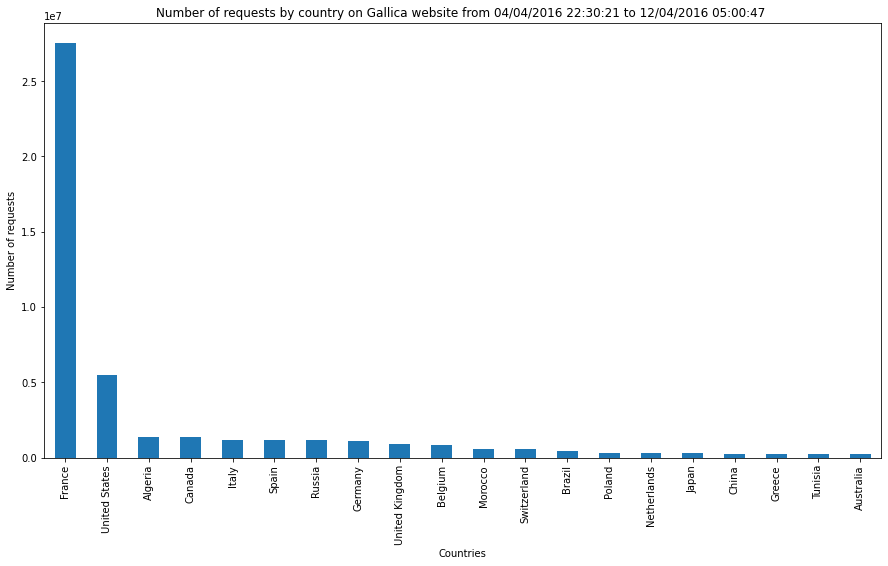

In [109]:

countries_count[:20].plot(kind='bar',figsize = (15,8));
plt.xlabel('Countries')
plt.ylabel('Number of requests')
plt.title('Number of requests by country on Gallica website from 04/04/2016 22:30:21 to 12/04/2016 05:00:47 ');


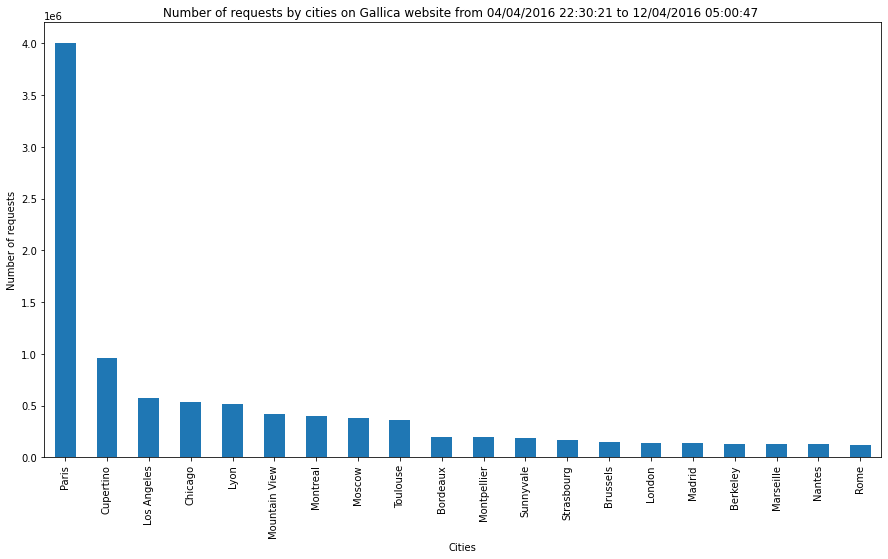

In [112]:
cities_count[:20].plot(kind='bar',figsize = (15,8));
plt.xlabel('Cities')
plt.ylabel('Number of requests')
plt.title('Number of requests by cities on Gallica website from 04/04/2016 22:30:21 to 12/04/2016 05:00:47 ');